In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import stitch
import utils
import features

In [2]:
def convertResult(img):
    '''Because of your images which were loaded by opencv, 
    in order to display the correct output with matplotlib, 
    you need to reduce the range of your floating point image from [0,255] to [0,1] 
    and converting the image from BGR to RGB:'''
    img = np.array(img,dtype=float)/float(255)
    img = img[:,:,::-1]
    return img

In [3]:
#load images
list_images=utils.loadImages(r'C:\Users\yl\Desktop\sucai\cd',resize=0)

zhtux1 = cv2.imread(r"C:\Users\yl\Desktop\sucai\TDMovieOut.2 (1).jpg")
zhtux2 = cv2.imread(r"C:\Users\yl\Desktop\sucai\TDMovieOut.2 (1).jpg")


In [4]:
#extract keypoints and descriptors using sift
k0,f0=features.findAndDescribeFeatures(list_images[0],opt='SIFT')
k1,f1=features.findAndDescribeFeatures(list_images[1],opt='SIFT')

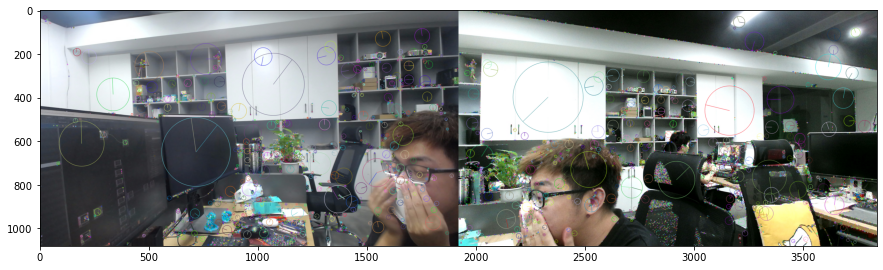

In [5]:
#draw keypoints
img0_kp=features.drawKeypoints(list_images[0],k0)
img1_kp=features.drawKeypoints(list_images[1],k1)

plt_img = np.concatenate((img0_kp, img1_kp), axis=1)
plt.figure(figsize=(15,15))
plt.imshow(convertResult(plt_img))

In [6]:
print(len(list_images[0]),len(list_images[1]),len(k0),len(k1))

1080 1080 2511 6120


In [7]:
#matching features using BruteForce 
mat=features.matchFeatures(f0,f1,ratio=0.6,opt='BF')
#Computing Homography matrix and mask
H,matMask=features.generateHomography(list_images[0],list_images[1])
#draw matches
# img=features.drawMatches(list_images[0],k0,list_images[1],k1,mat,matMask)
# plt.figure(figsize=(15,15))
# plt.imshow(convertResult(img))

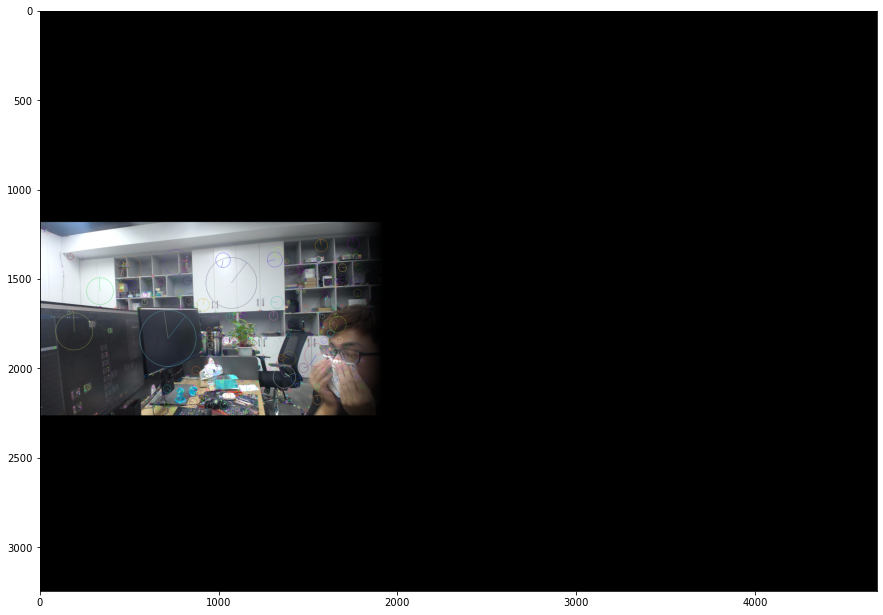

In [8]:
#wrap 2 image
#choose list_images[0] as desination
pano,non_blend,left_side,right_side=stitch.warpTwoImages(list_images[1],list_images[0],True)
#display the leftside of pano before cropping
plt.figure(figsize=(15,15))
plt.imshow(convertResult(left_side))

In [10]:
#wrap 2 image
#choose list_images[0] as desination
pano,non_blend,left_side,right_side=stitch.warpTwoImages(zhtux1,zhtux2,True)
#display the leftside of pano before cropping
plt.figure(figsize=(15,15))
plt.imshow(convertResult(left_side))

error: OpenCV(3.4.2) c:\projects\opencv-python\opencv\modules\imgproc\src\color.hpp:253: error: (-215:Assertion failed) VScn::contains(scn) && VDcn::contains(dcn) && VDepth::contains(depth) in function 'cv::CvtHelper<struct cv::Set<3,4,-1>,struct cv::Set<1,-1,-1>,struct cv::Set<0,2,5>,2>::CvtHelper'


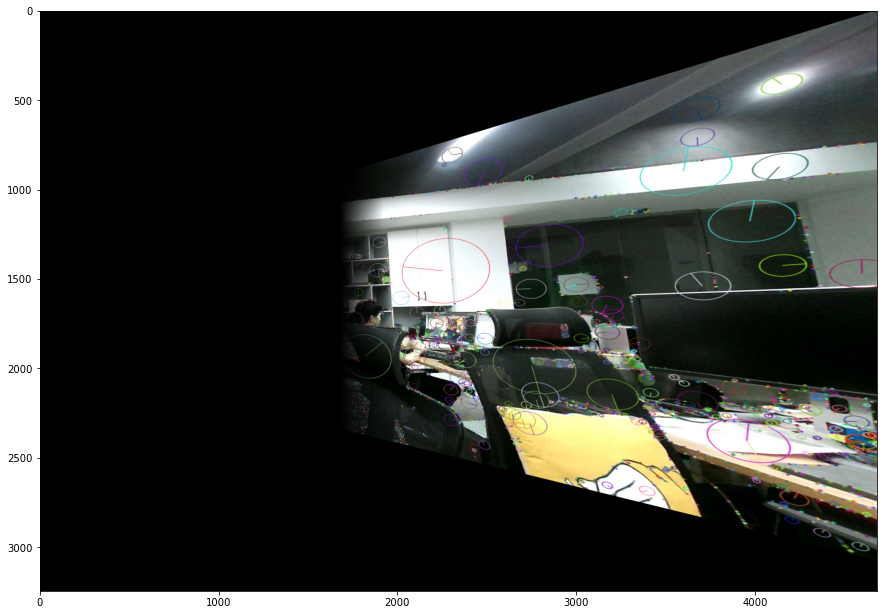

In [11]:
#display the rightside of pano before cropping
plt.figure(figsize=(15,15))
plt.imshow(convertResult(right_side))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


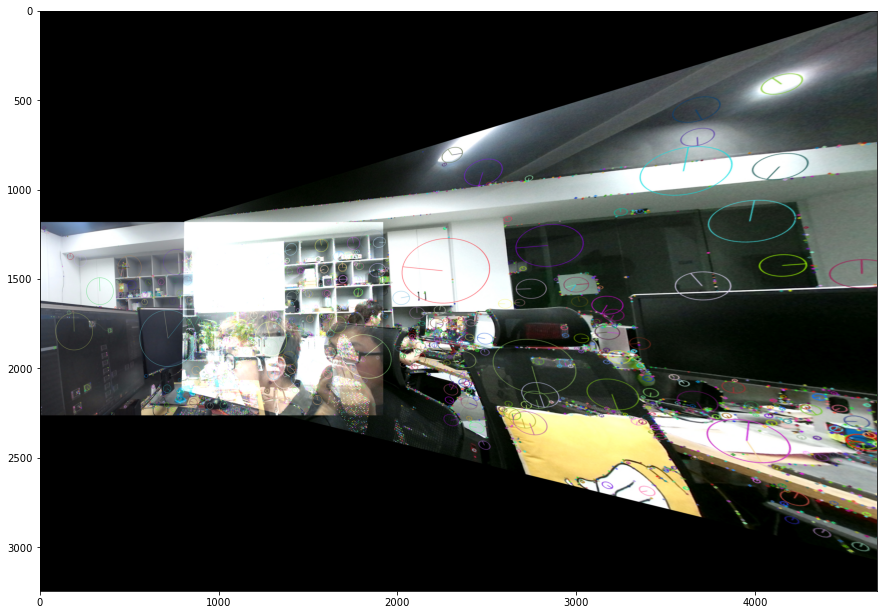

In [12]:
#display pano without cropping and blending
plt.figure(figsize=(15,15))
plt.imshow(convertResult(non_blend))

In [13]:
#if you choose list_images[1] as desination, the output look like this
_,non_blend2,_,_=stitch.warpTwoImages(list_images[0],list_images[1],True)
plt.figure(figsize=(15,15))
plt.imshow(convertResult(non_blend2))

Exception: ('Please try again with another image set!', ValueError('could not broadcast input array from shape (1080,1920,3) into shape (1080,1031,3)',))

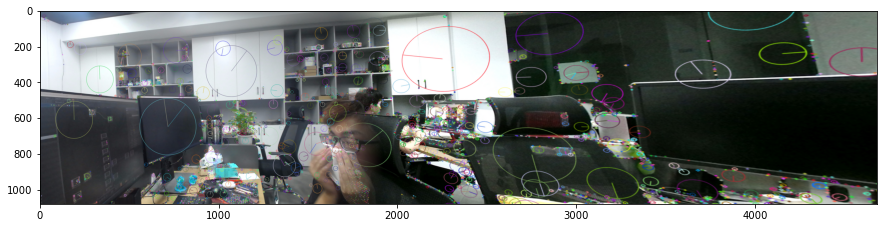

In [14]:
#pano after cropping and blending
plt.figure(figsize=(15,15))
plt.imshow(convertResult(pano))

In [ ]:
#multi stitching
panorama=stitch.multiStitching(list_images)
plt.figure(figsize=(20,20))
plt.imshow(convertResult(panorama))

In [ ]:
len(list_images)